In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/healthcare-dataset-stroke-data/Screen Shot 2018-04-17 at 12.15.42 AM.png
/kaggle/input/healthcare-dataset-stroke-data/train_2v.csv
/kaggle/input/healthcare-dataset-stroke-data/test_2v.csv


In [2]:
test = pd.read_csv('/kaggle/input/healthcare-dataset-stroke-data/test_2v.csv')
train = pd.read_csv('/kaggle/input/healthcare-dataset-stroke-data/train_2v.csv')

In [3]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [5]:
print(train.shape)
(train.isnull().sum()/len(train))*100

(43400, 12)


id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64

In [6]:
print(test.shape)
(test.isnull().sum()/len(test))*100

(18601, 11)


id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.177249
smoking_status       30.917693
dtype: float64

In [7]:
print('Work type {}'.format(train['work_type'].unique()))
print('Residence type {}'.format(train['Residence_type'].unique()))
print('Smoking Status {}'.format(train['smoking_status'].unique()))
print('Ever Married {}'.format(train['ever_married'].unique()))

Work type ['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
Residence type ['Rural' 'Urban']
Smoking Status [nan 'never smoked' 'formerly smoked' 'smokes']
Ever Married ['No' 'Yes']


In [8]:
train_set = pd.DataFrame(train)
train_set['smoking_status'].fillna('Smoking Unknown', inplace = True)
train_set.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Smoking Unknown,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Smoking Unknown,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Smoking Unknown,0


In [9]:
(train_set.isnull().sum()/len(train_set))*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.368664
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [10]:
sample_set = train_set[train_set['bmi'].isnull()][0:30]
sample_set

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
81,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
95,31091,Male,34.0,0,1,Yes,Private,Urban,106.23,NaN,formerly smoked,0
113,54312,Female,76.0,1,0,Yes,Self-employed,Urban,209.58,NaN,never smoked,0
186,11999,Female,63.0,0,0,Yes,Govt_job,Rural,79.92,NaN,smokes,0
231,22470,Male,61.0,0,0,Yes,Govt_job,Urban,184.15,NaN,Smoking Unknown,0
233,15649,Male,54.0,1,0,Yes,Private,Rural,198.69,NaN,smokes,0
278,16380,Male,40.0,0,0,Yes,Private,Rural,89.77,NaN,smokes,0
407,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Smoking Unknown,1
429,68995,Female,48.0,1,0,No,Private,Rural,118.14,NaN,formerly smoked,0
432,967,Male,61.0,0,1,Yes,Private,Urban,88.27,NaN,never smoked,0


In [11]:
missing_female_bmi_ages = pd.DataFrame(sample_set['age'][(sample_set['bmi'].isnull()) & (sample_set['gender']=='Female')])
missing_male_bmi_ages = pd.DataFrame(sample_set['age'][(sample_set['bmi'].isnull()) & (sample_set['gender']=='Male')])

In [12]:
print('female {}\nmale {}'.format(len(missing_female_bmi_ages),len(missing_male_bmi_ages)))

female 17
male 13


In [13]:
missing_f_bmi_ages = pd.DataFrame(missing_female_bmi_ages.groupby(['age']).size().reset_index(name='count').sort_values(by= ['count'], ascending=False))
missing_f_bmi_ages[:5]

,age,count
4,23.0,2
11,71.0,2
0,3.0,1
1,6.0,1
2,9.0,1


In [14]:
missing_m_bmi_ages = pd.DataFrame(missing_male_bmi_ages.groupby(['age']).size().reset_index(name='count').sort_values(by= ['count'], ascending=False))
missing_m_bmi_ages[:5]

,age,count
4,40.0,2
8,61.0,2
0,13.0,1
1,31.0,1
2,34.0,1


In [15]:
sample_set['bmi'].loc[sample_set.index == 81] = 12
sample_set.loc[sample_set.index == 81]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
81,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,12.0,never smoked,1


In [16]:
# test function for replacing missing bmi with the average values of bmis

for index, gender, age in zip(sample_set.index,sample_set['gender'],sample_set['age']):
    avg_bmi = round(train_set['bmi'][(train_set['bmi'].notnull()) & (train_set['gender']== gender) & (train_set['age'] == age)].mean(),2)
    sample_set['bmi'].loc[sample_set.index == index] = avg_bmi
    

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
#function seems to work okay
sample_set

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
81,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.60,never smoked,1
95,31091,Male,34.0,0,1,Yes,Private,Urban,106.23,30.38,formerly smoked,0
113,54312,Female,76.0,1,0,Yes,Self-employed,Urban,209.58,29.99,never smoked,0
186,11999,Female,63.0,0,0,Yes,Govt_job,Rural,79.92,31.75,smokes,0
231,22470,Male,61.0,0,0,Yes,Govt_job,Urban,184.15,31.52,Smoking Unknown,0
233,15649,Male,54.0,1,0,Yes,Private,Rural,198.69,31.53,smokes,0
278,16380,Male,40.0,0,0,Yes,Private,Rural,89.77,30.63,smokes,0
407,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,31.00,Smoking Unknown,1
429,68995,Female,48.0,1,0,No,Private,Rural,118.14,31.38,formerly smoked,0
432,967,Male,61.0,0,1,Yes,Private,Urban,88.27,31.52,never smoked,0


In [18]:
def replace_bmi_test(dataset):
    
    for index, gender, age in zip(dataset.index,dataset['gender'],dataset['age']):
        avg_bmi = round(train_set['bmi'][(train_set['bmi'].notnull()) & (train_set['gender']== gender) & (train_set['age'] == age)].mean(),2)
        dataset['bmi'].loc[dataset.index == index] = avg_bmi

In [19]:
sample_set = train_set[train_set['bmi'].isnull()][0:30]
replace_bmi_test(sample_set)
sample_set

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
81,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.60,never smoked,1
95,31091,Male,34.0,0,1,Yes,Private,Urban,106.23,30.38,formerly smoked,0
113,54312,Female,76.0,1,0,Yes,Self-employed,Urban,209.58,29.99,never smoked,0
186,11999,Female,63.0,0,0,Yes,Govt_job,Rural,79.92,31.75,smokes,0
231,22470,Male,61.0,0,0,Yes,Govt_job,Urban,184.15,31.52,Smoking Unknown,0
233,15649,Male,54.0,1,0,Yes,Private,Rural,198.69,31.53,smokes,0
278,16380,Male,40.0,0,0,Yes,Private,Rural,89.77,30.63,smokes,0
407,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,31.00,Smoking Unknown,1
429,68995,Female,48.0,1,0,No,Private,Rural,118.14,31.38,formerly smoked,0
432,967,Male,61.0,0,1,Yes,Private,Urban,88.27,31.52,never smoked,0


In [20]:
def replace_bmi(train_set):
    """replaces the null bmi values with the average bmi for that gender and age
    
    input: full data set
    output: replaces null bmi values in the input dataset"""
    
    #get rows with null values for bmi
    null_set = train_set[train_set['bmi'].isnull()]
    
    for index, gender, age in zip(null_set.index,null_set['gender'],null_set['age']):
        
        if gender in ['Female','Male']:
            avg_bmi = round(train_set['bmi'][(train_set['bmi'].notnull()) & (train_set['gender']== gender) & (train_set['age'] == age)].mean(),2)
            train_set['bmi'].loc[train_set.index == index] = avg_bmi
        elif gender == 'Other':
            avg_bmi = round(train_set['bmi'][(train_set['bmi'].notnull()) & (train_set['age'] == age)].mean(),2)
            train_set['bmi'].loc[train_set.index == index] = avg_bmi

In [21]:
missing_m_bmi_ages = pd.DataFrame(missing_male_bmi_ages.groupby(['age']).size().reset_index(name='count').sort_values(by= ['count'], ascending=False))
missing_m_bmi_ages[:5]

,age,count
4,40.0,2
8,61.0,2
0,13.0,1
1,31.0,1
2,34.0,1


In [22]:
missing_f_bmi_ages = pd.DataFrame(missing_female_bmi_ages.groupby(['age']).size().reset_index(name='count').sort_values(by= ['count'], ascending=False))
missing_f_bmi_ages[:5]

,age,count
4,23.0,2
11,71.0,2
0,3.0,1
1,6.0,1
2,9.0,1


In [23]:
train_set[81:101]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
81,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
82,54918,Female,18.0,0,0,No,Private,Rural,111.38,38.4,smokes,0
83,59368,Female,78.0,0,0,Yes,Private,Urban,243.50,26.1,never smoked,0
84,65836,Female,78.0,1,0,Yes,Private,Urban,182.20,30.5,formerly smoked,0
85,21130,Male,33.0,0,0,Yes,Self-employed,Urban,229.92,25.9,smokes,0
86,1703,Female,52.0,0,0,Yes,Private,Urban,82.24,54.7,formerly smoked,0
87,16934,Female,51.0,0,0,Yes,Self-employed,Rural,89.84,29.9,Smoking Unknown,0
88,28799,Male,11.0,0,0,No,children,Rural,90.69,18.6,Smoking Unknown,0
89,32689,Female,48.0,0,0,Yes,Private,Urban,84.38,27.1,Smoking Unknown,0
90,56357,Female,82.0,0,1,No,Private,Urban,215.60,24.9,never smoked,0


In [24]:
replace_bmi(train_set)


In [25]:
train_set[81:101]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
81,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.60,never smoked,1
82,54918,Female,18.0,0,0,No,Private,Rural,111.38,38.40,smokes,0
83,59368,Female,78.0,0,0,Yes,Private,Urban,243.50,26.10,never smoked,0
84,65836,Female,78.0,1,0,Yes,Private,Urban,182.20,30.50,formerly smoked,0
85,21130,Male,33.0,0,0,Yes,Self-employed,Urban,229.92,25.90,smokes,0
86,1703,Female,52.0,0,0,Yes,Private,Urban,82.24,54.70,formerly smoked,0
87,16934,Female,51.0,0,0,Yes,Self-employed,Rural,89.84,29.90,Smoking Unknown,0
88,28799,Male,11.0,0,0,No,children,Rural,90.69,18.60,Smoking Unknown,0
89,32689,Female,48.0,0,0,Yes,Private,Urban,84.38,27.10,Smoking Unknown,0
90,56357,Female,82.0,0,1,No,Private,Urban,215.60,24.90,never smoked,0


In [26]:
#let's check that the averages are being calculated correctly
avg_bmi = train_set['bmi'][(train_set['bmi'].notnull()) & (train_set['gender']=='Female') & (train_set['age'] == 61)].mean()
round(avg_bmi,2)

31.6

In [27]:
#let's check that the averages are being calculated correctly
avg_bmi = train_set['bmi'][(train_set['bmi'].notnull()) & (train_set['gender']=='Male') & (train_set['age'] == 34)].mean()
round(avg_bmi,2)

30.38

In [28]:
train_set.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Smoking Unknown,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Smoking Unknown,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Smoking Unknown,0


In [29]:
(train_set.isnull().sum()/len(train_set))*100

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [30]:
train_set.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [31]:
#here is what has caused those null values. There are 4 cases when the value for gender is other
train_set[train_set['bmi'].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [32]:
#for simplicity we will drop these 4 for now

train_set.drop(train_set.index[train_set[train_set['bmi'].isnull()].index], inplace= True)

In [33]:
train_set.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [34]:
sample_set.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
81,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.60,never smoked,1
95,31091,Male,34.0,0,1,Yes,Private,Urban,106.23,30.38,formerly smoked,0
113,54312,Female,76.0,1,0,Yes,Self-employed,Urban,209.58,29.99,never smoked,0
186,11999,Female,63.0,0,0,Yes,Govt_job,Rural,79.92,31.75,smokes,0
231,22470,Male,61.0,0,0,Yes,Govt_job,Urban,184.15,31.52,Smoking Unknown,0


In [35]:
#encode string values in columns
sample_set = pd.concat([sample_set, pd.get_dummies(sample_set['gender'], prefix='gender')],axis=1)
sample_set.drop(['gender'],axis=1,inplace=True)
sample_set.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male
81,51676,61.0,0,0,Yes,Self-employed,Rural,202.21,31.60,never smoked,1,1,0
95,31091,34.0,0,1,Yes,Private,Urban,106.23,30.38,formerly smoked,0,0,1
113,54312,76.0,1,0,Yes,Self-employed,Urban,209.58,29.99,never smoked,0,1,0
186,11999,63.0,0,0,Yes,Govt_job,Rural,79.92,31.75,smokes,0,1,0
231,22470,61.0,0,0,Yes,Govt_job,Urban,184.15,31.52,Smoking Unknown,0,0,1


In [36]:
sample_set = pd.concat([sample_set, pd.get_dummies(sample_set['ever_married'], prefix='married')],axis=1)
sample_set.drop(['ever_married'],axis=1,inplace=True)
sample_set.head()

,id,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,married_No,married_Yes
81,51676,61.0,0,0,Self-employed,Rural,202.21,31.60,never smoked,1,1,0,0,1
95,31091,34.0,0,1,Private,Urban,106.23,30.38,formerly smoked,0,0,1,0,1
113,54312,76.0,1,0,Self-employed,Urban,209.58,29.99,never smoked,0,1,0,0,1
186,11999,63.0,0,0,Govt_job,Rural,79.92,31.75,smokes,0,1,0,0,1
231,22470,61.0,0,0,Govt_job,Urban,184.15,31.52,Smoking Unknown,0,0,1,0,1


In [37]:
sample_set = pd.concat([sample_set, pd.get_dummies(sample_set['work_type'], prefix='work')],axis=1)
sample_set.drop(['work_type'],axis=1,inplace=True)
sample_set.head()

,id,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,married_No,married_Yes,work_Govt_job,work_Private,work_Self-employed,work_children
81,51676,61.0,0,0,Rural,202.21,31.60,never smoked,1,1,0,0,1,0,0,1,0
95,31091,34.0,0,1,Urban,106.23,30.38,formerly smoked,0,0,1,0,1,0,1,0,0
113,54312,76.0,1,0,Urban,209.58,29.99,never smoked,0,1,0,0,1,0,0,1,0
186,11999,63.0,0,0,Rural,79.92,31.75,smokes,0,1,0,0,1,1,0,0,0
231,22470,61.0,0,0,Urban,184.15,31.52,Smoking Unknown,0,0,1,0,1,1,0,0,0


In [38]:
sample_set = pd.concat([sample_set, pd.get_dummies(sample_set['Residence_type'], prefix='Res')],axis=1)
sample_set.drop(['Residence_type'],axis=1,inplace=True)
sample_set.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,married_No,married_Yes,work_Govt_job,work_Private,work_Self-employed,work_children,Res_Rural,Res_Urban
81,51676,61.0,0,0,202.21,31.60,never smoked,1,1,0,0,1,0,0,1,0,1,0
95,31091,34.0,0,1,106.23,30.38,formerly smoked,0,0,1,0,1,0,1,0,0,0,1
113,54312,76.0,1,0,209.58,29.99,never smoked,0,1,0,0,1,0,0,1,0,0,1
186,11999,63.0,0,0,79.92,31.75,smokes,0,1,0,0,1,1,0,0,0,1,0
231,22470,61.0,0,0,184.15,31.52,Smoking Unknown,0,0,1,0,1,1,0,0,0,0,1


In [39]:
sample_set = pd.concat([sample_set, pd.get_dummies(sample_set['smoking_status'])],axis=1)
sample_set.drop(['smoking_status'],axis=1,inplace=True)
sample_set.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,married_No,...,work_Govt_job,work_Private,work_Self-employed,work_children,Res_Rural,Res_Urban,Smoking Unknown,formerly smoked,never smoked,smokes
81,51676,61.0,0,0,202.21,31.60,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
95,31091,34.0,0,1,106.23,30.38,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
113,54312,76.0,1,0,209.58,29.99,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
186,11999,63.0,0,0,79.92,31.75,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
231,22470,61.0,0,0,184.15,31.52,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0


In [40]:
train_set.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Smoking Unknown,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Smoking Unknown,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Smoking Unknown,0


In [41]:
#let's do this on the full dataset

train_set = pd.concat([train_set, pd.get_dummies(train_set['gender'])],axis=1)
train_set = pd.concat([train_set, pd.get_dummies(train_set['ever_married'], prefix='married')],axis=1)
train_set = pd.concat([train_set, pd.get_dummies(train_set['work_type'], prefix='work')],axis=1)
train_set = pd.concat([train_set, pd.get_dummies(train_set['Residence_type'], prefix='Res')],axis=1)
train_set = pd.concat([train_set, pd.get_dummies(train_set['smoking_status'])],axis=1)
train_set.drop(['ever_married','work_type','Residence_type','smoking_status'],axis=1,inplace=True)
train_set.head()

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,...,work_Never_worked,work_Private,work_Self-employed,work_children,Res_Rural,Res_Urban,Smoking Unknown,formerly smoked,never smoked,smokes
0,30669,Male,3.0,0,0,95.12,18.0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
1,30468,Male,58.0,1,0,87.96,39.2,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,16523,Female,8.0,0,0,110.89,17.6,0,1,0,...,0,1,0,0,0,1,1,0,0,0
3,56543,Female,70.0,0,0,69.04,35.9,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4,46136,Male,14.0,0,0,161.28,19.1,0,0,1,...,1,0,0,0,1,0,1,0,0,0


In [42]:
train_set.loc[train_set['gender']=='Other']

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,...,work_Never_worked,work_Private,work_Self-employed,work_children,Res_Rural,Res_Urban,Smoking Unknown,formerly smoked,never smoked,smokes
2914,56156,Other,26.0,0,0,143.33,22.40,0,0,0,...,0,1,0,0,1,0,0,1,0,0
10768,26188,Other,46.0,0,0,83.28,30.99,0,0,0,...,0,1,0,0,1,0,0,0,1,0
15620,52984,Other,27.0,0,0,62.45,29.19,0,0,0,...,0,1,0,0,0,1,0,0,0,1
15838,24893,Other,53.0,0,0,89.65,31.04,0,0,0,...,0,1,0,0,1,0,1,0,0,0
19748,13471,Other,39.0,0,0,95.59,32.00,0,0,0,...,0,0,0,0,0,1,0,1,0,0
21041,31015,Other,19.0,0,0,75.76,32.20,0,0,0,...,0,1,0,0,1,0,0,1,0,0
21192,27043,Other,49.0,0,0,94.88,37.20,0,0,0,...,0,1,0,0,0,1,0,0,1,0
24252,51111,Other,51.0,0,0,91.75,32.20,0,0,0,...,0,1,0,0,1,0,0,1,0,0
26199,42452,Other,10.0,0,0,72.05,21.20,0,0,0,...,0,0,0,1,1,0,0,1,0,0
26831,49812,Other,53.0,0,0,65.29,31.04,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [43]:
test.loc[test['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
7142,10358,Other,9.0,0,0,No,children,Rural,65.83,17.0,NaN
9480,50226,Other,6.0,0,0,No,children,Urban,99.13,NaN,NaN


<Figure size 2880x2880 with 0 Axes>

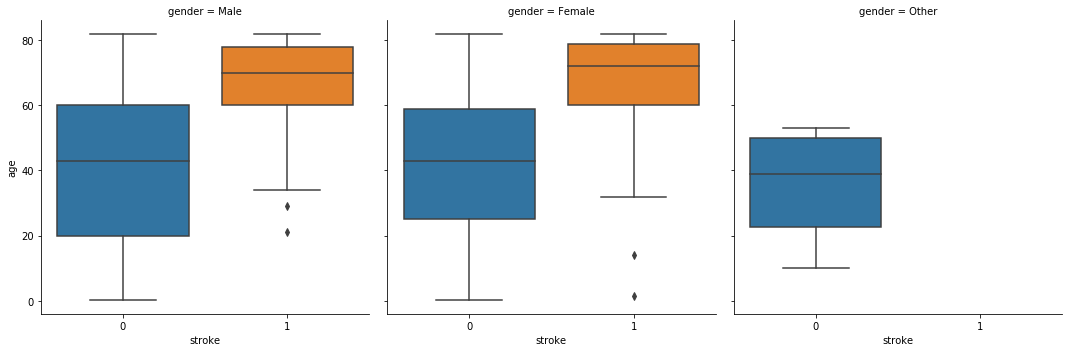

In [44]:
#view correlations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40,40))
sns.catplot(y = 'age',x ='stroke',data=train_set, col='gender',kind='box')
plt.show()

<Figure size 2880x2880 with 0 Axes>

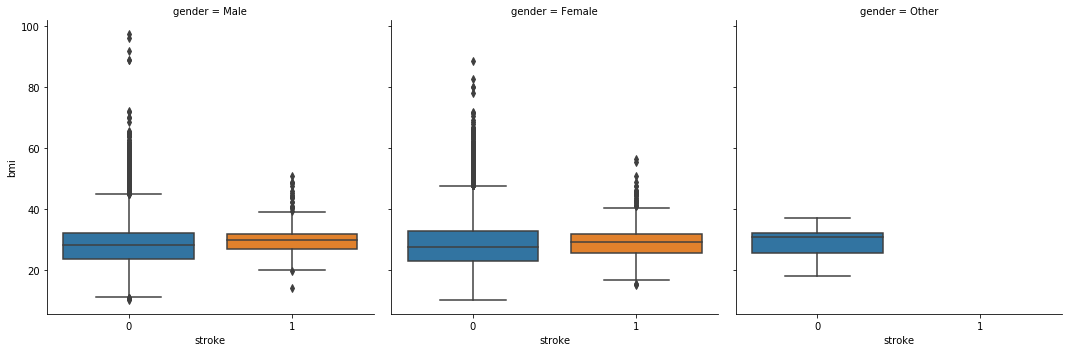

In [45]:
plt.figure(figsize=(40,40))
sns.catplot(x ='stroke',y = 'bmi',data=train_set, col='gender',kind='box')
plt.show()

<Figure size 2880x2880 with 0 Axes>

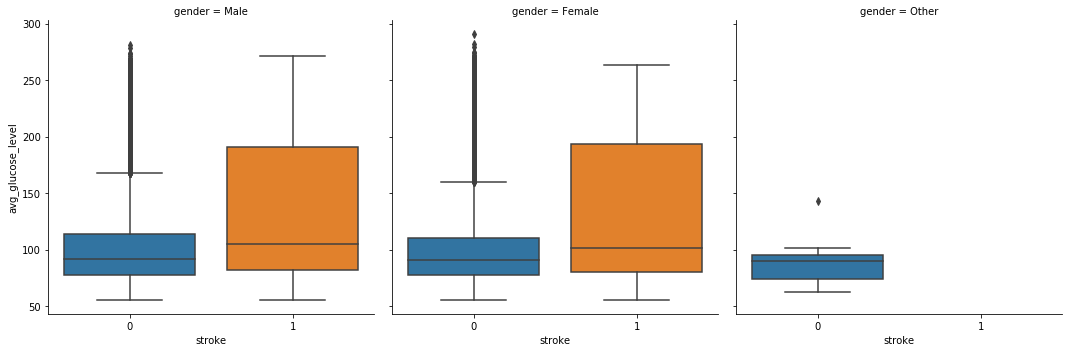

In [46]:
plt.figure(figsize=(40,40))
sns.catplot(x ='stroke',y = 'avg_glucose_level',data=train_set, col='gender',kind='box')
plt.show()

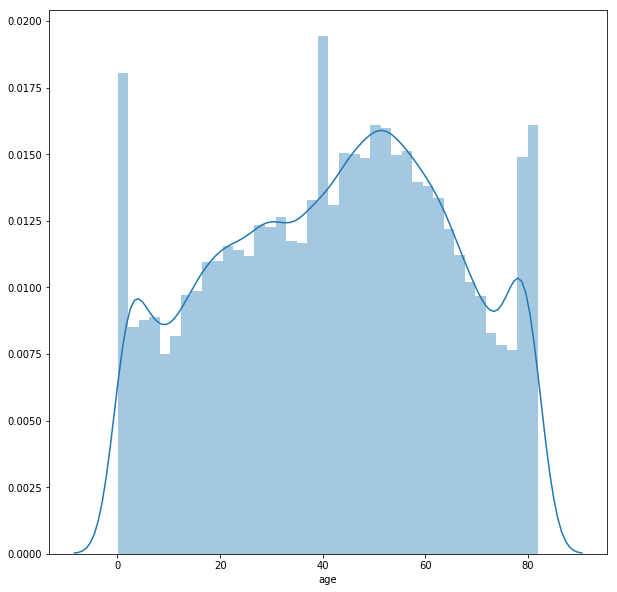

In [47]:
plt.figure(figsize=(10,10))
sns.distplot(train_set['age'])
plt.show()

In [48]:
y= train_set['stroke']
x = train_set.drop(['stroke','gender','Smoking Unknown','formerly smoked','never smoked','smokes'],axis=1)


In [49]:
x.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,Other,married_No,married_Yes,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,Res_Rural,Res_Urban
0,30669,3.0,0,0,95.12,18.0,0,1,0,1,0,0,0,0,0,1,1,0
1,30468,58.0,1,0,87.96,39.2,0,1,0,0,1,0,0,1,0,0,0,1
2,16523,8.0,0,0,110.89,17.6,1,0,0,1,0,0,0,1,0,0,0,1
3,56543,70.0,0,0,69.04,35.9,1,0,0,0,1,0,0,1,0,0,1,0
4,46136,14.0,0,0,161.28,19.1,0,1,0,1,0,0,1,0,0,0,1,0


In [50]:
from sklearn.preprocessing import StandardScaler
x= StandardScaler().fit(x).transform(x)
x[0:5]

array([[-0.26846865, -1.74151677, -0.32129564, -0.22334159, -0.21717647,
        -1.38881952, -1.20297067,  1.20360176, -0.01592233,  1.34420288,
        -1.34420288, -0.37856142, -0.06399252, -1.15654934, -0.43077326,
         2.45968138,  1.00258398, -1.00258398],
       [-0.27800742,  0.700823  ,  3.11239826, -0.22334159, -0.38325839,
         1.37825748, -1.20297067,  1.20360176, -0.01592233, -0.74393532,
         0.74393532, -0.37856142, -0.06399252,  0.86464102, -0.43077326,
        -0.40655672, -0.99742268,  0.99742268],
       [-0.93978947, -1.51948588, -0.32129564, -0.22334159,  0.14862128,
        -1.44102852,  0.83127546, -0.8308396 , -0.01592233,  1.34420288,
        -1.34420288, -0.37856142, -0.06399252,  0.86464102, -0.43077326,
        -0.40655672, -0.99742268,  0.99742268],
       [ 0.95942299,  1.23369714, -0.32129564, -0.22334159, -0.82212291,
         0.94753323,  0.83127546, -0.8308396 , -0.01592233, -0.74393532,
         0.74393532, -0.37856142, -0.06399252,  0.864

In [51]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

In [52]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

x_resampled, y_resampled = ros.fit_resample(x,y)

Using TensorFlow backend.


In [53]:
print ('ROS x values: {}'.format(x_resampled.shape))
print ('ROS y values: {}'.format(y_resampled.shape))

ROS x values: (85234, 18)
ROS y values: (85234,)


In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled,test_size = 0.2)

In [55]:
print('x train: {}\nx_test: {}'.format(len(x_train),len(x_test)))

x train: 68187
x_test: 17047


In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


DT_gs = DecisionTreeClassifier()
params = {'criterion': ['gini', 'entropy'],
         'max_depth': [5,7,9,12,15,20,30,100,200],
         'max_features': ['sqrt','log2']}
gs = GridSearchCV(DT_gs, params, cv=3, n_jobs = -1)
gs_fit = gs.fit(x_train, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
14,0.126648,0.001492,0.009167,0.000093,gini,100,sqrt,"{'criterion': 'gini', 'max_depth': 100, 'max_f...",0.986802,0.986053,0.985656,0.986170,0.000475,1
16,0.131933,0.001787,0.009443,0.000168,gini,200,sqrt,"{'criterion': 'gini', 'max_depth': 200, 'max_f...",0.985702,0.984293,0.988032,0.986009,0.001542,2
34,0.172589,0.029346,0.009588,0.000477,entropy,200,sqrt,"{'criterion': 'entropy', 'max_depth': 200, 'ma...",0.985922,0.985041,0.986624,0.985862,0.000648,3
33,0.152334,0.010116,0.009382,0.000632,entropy,100,log2,"{'criterion': 'entropy', 'max_depth': 100, 'ma...",0.985262,0.985833,0.986360,0.985818,0.000449,4
15,0.134002,0.009243,0.009436,0.000052,gini,100,log2,"{'criterion': 'gini', 'max_depth': 100, 'max_f...",0.984778,0.985393,0.987240,0.985804,0.001046,5


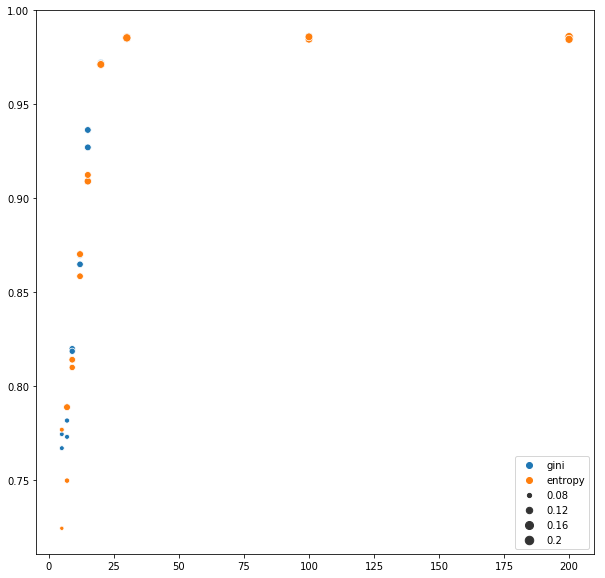

In [57]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='param_max_depth', y='mean_test_score',data=gs_fit.cv_results_, hue = 'param_criterion' ,size = 'mean_fit_time')

In [58]:
y_pred = gs_fit.predict(x_test)

print(gs_fit.best_params_)

{'criterion': 'gini', 'max_depth': 100, 'max_features': 'sqrt'}


In [62]:
from sklearn.metrics import classification_report,confusion_matrix
tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 30, max_features='sqrt')
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)
y_train_pred = tree.predict(x_train)

print('training accuracy: {}'.format(metrics.accuracy_score(y_test,y_pred)))
print('test accuracy: {}\n'.format(metrics.accuracy_score(y_train,y_train_pred)))
print('Classification Report')
print(classification_report(y_test, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))

training accuracy: 0.9886783598287089
test accuracy: 0.9997946822708141

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      8526
           1       0.98      1.00      0.99      8521

    accuracy                           0.99     17047
   macro avg       0.99      0.99      0.99     17047
weighted avg       0.99      0.99      0.99     17047

Confusion Matrix
[[8333  193]
 [   0 8521]]
